In [1]:
#Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Reading the csv files
income_data = pd.read_csv("Agg household income.csv")

In [3]:
#Displaying the first few rows to understand the data structure
income_data.head()

,Neighborhood,Id,Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars),Margin of Error; Aggregate
0,Allegheny Center,1,39947000,6437773
1,Allegheny West,2,23793300,22025939
2,Allentown,3,38303700,7490207.043
3,Arlington,4,35349900,6140662.723
4,Arlington Heights,5,2389600,1162393


In [4]:
#These are the column titles
print(income_data.columns)

Index(['Neighborhood', 'Id',
       'Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)',
       'Margin of Error; Aggregate'],
      dtype='object')


In [5]:
%store income_data

Stored 'income_data' (DataFrame)


In [6]:
#The data types of each column
print(income_data.dtypes)

Neighborhood                                                                                       object
Id                                                                                                  int64
Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)    object
Margin of Error; Aggregate                                                                         object
dtype: object


In [7]:
#Converting the Estimate aggregate household income in the past 12 months column to numeric
income_data["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"] = pd.to_numeric(income_data["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"],errors = "coerce")

In [8]:
#Rechecking the data types of the columns
print(income_data.dtypes)

Neighborhood                                                                                        object
Id                                                                                                   int64
Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)    float64
Margin of Error; Aggregate                                                                          object
dtype: object


In [9]:
#Converting the Margin of error column to numeric
income_data["Margin of Error; Aggregate"] = pd.to_numeric(income_data["Margin of Error; Aggregate"], errors = "coerce")

In [10]:
#Rechecking the data types of the columns
print(income_data.dtypes)

Neighborhood                                                                                        object
Id                                                                                                   int64
Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)    float64
Margin of Error; Aggregate                                                                         float64
dtype: object


In [11]:
#Getting a description of the data
income_data.describe()

,Id,Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars),Margin of Error; Aggregate
count,91.00000,8.900000e+01,8.900000e+01
mean,46.00000,9.347451e+07,1.342280e+07
std,26.41338,1.240740e+08,1.276778e+07
min,1.00000,2.389600e+06,1.162393e+06
25%,23.50000,2.501490e+07,4.415906e+06
50%,46.00000,5.228870e+07,9.345350e+06
75%,68.50000,9.635350e+07,1.657579e+07
max,91.00000,6.598863e+08,6.636378e+07


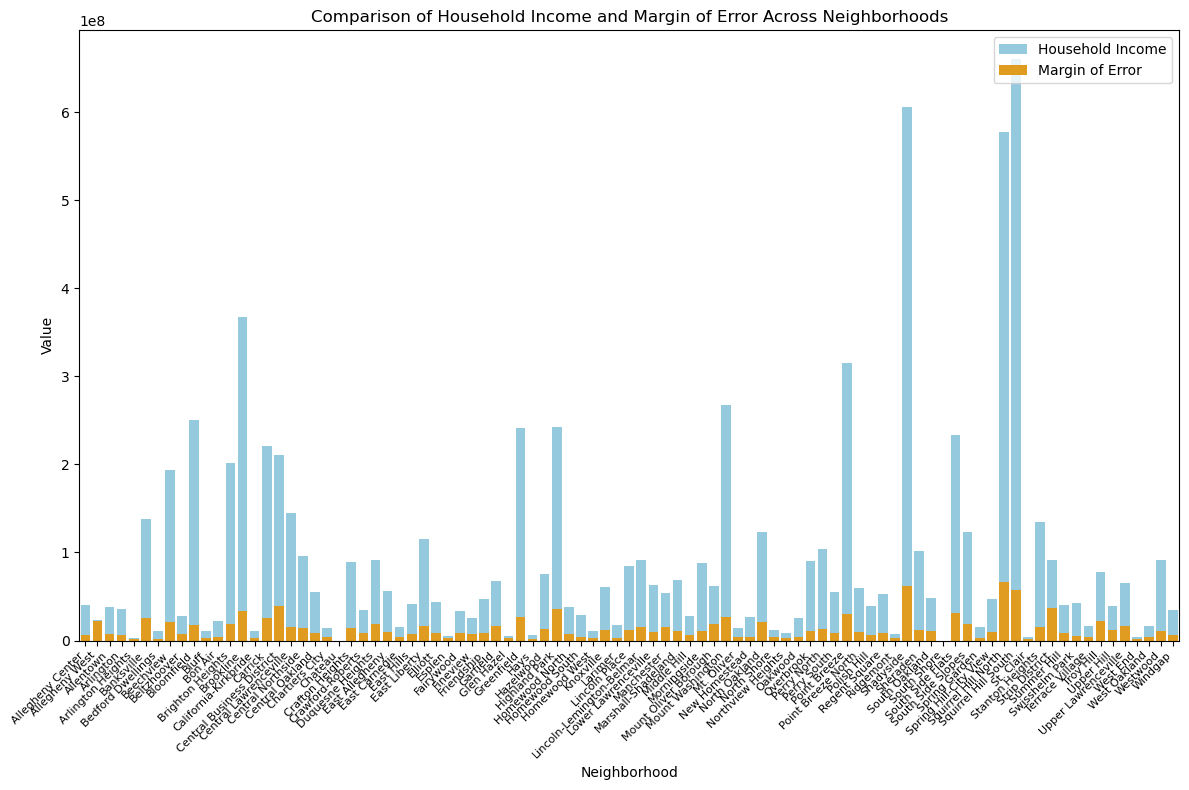

In [12]:
#Plotting a combined bar graph
grouped_data = income_data.groupby('Neighborhood').mean().reset_index()

plt.figure(figsize=(12, 8))

sns.barplot(x='Neighborhood', 
            y='Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)', 
            data=grouped_data, 
            color='skyblue', 
            label='Household Income')

sns.barplot(x='Neighborhood', 
            y='Margin of Error; Aggregate', 
            data=grouped_data, 
            color='orange', 
            label='Margin of Error')

plt.xlabel('Neighborhood')
plt.ylabel('Value')
plt.title('Comparison of Household Income and Margin of Error Across Neighborhoods')
plt.legend(loc='upper right')

plt.xticks(rotation=45, ha='right')
plt.xticks(fontsize=8)

plt.tight_layout()
plt.show()

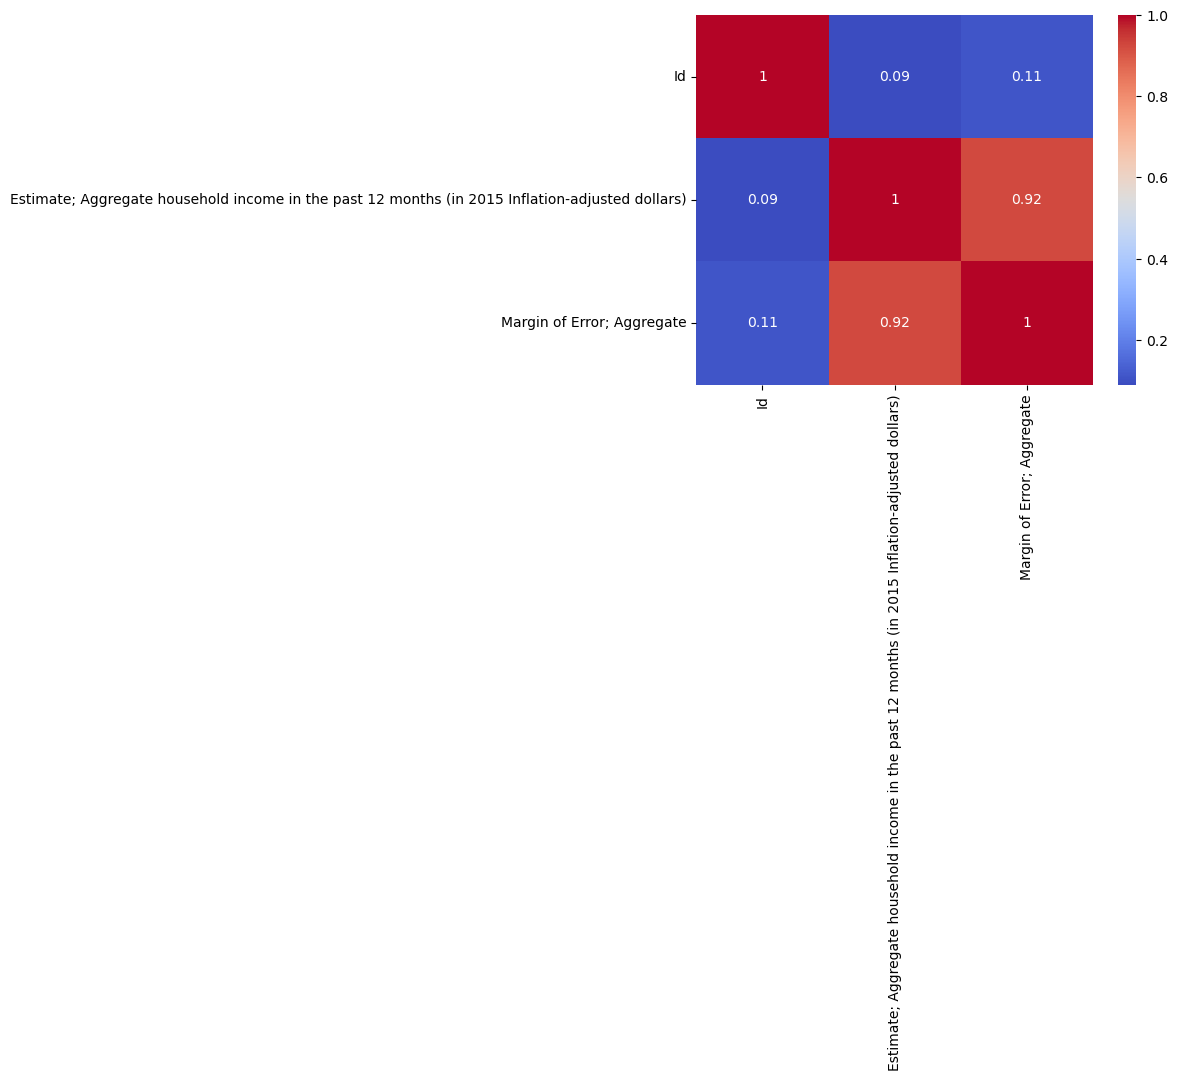

In [13]:
#Plotting a correlation matrix
numeric_data = income_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [14]:
#Checking the number of missing values in each columns
missing_values = income_data.isnull().sum()
print(missing_values)

Neighborhood                                                                                       0
Id                                                                                                 0
Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)    2
Margin of Error; Aggregate                                                                         2
dtype: int64


In [15]:
#Replacing the missing values with the mean of the columns
income_data[['Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)', 'Margin of Error; Aggregate']] = (
    income_data[['Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)', 'Margin of Error; Aggregate']]
    .apply(lambda x: x.fillna(x.mean()), axis=0)
)

In [16]:
#Rechecking the number of missing values in the columns
missing_values2 = income_data.isnull().sum()
print(missing_values2)

Neighborhood                                                                                       0
Id                                                                                                 0
Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)    0
Margin of Error; Aggregate                                                                         0
dtype: int64


In [17]:
#Determining the unique values in the neighborhood
print(income_data['Neighborhood'].unique())

['Allegheny Center' 'Allegheny West' 'Allentown' 'Arlington'
 'Arlington Heights' 'Banksville' 'Bedford Dwellings' 'Beechview'
 'Beltzhoover' 'Bloomfield' 'Bluff' 'Bon Air' 'Brighton Heights'
 'Brookline' 'California-Kirkbride' 'Carrick' 'Central Business District'
 'Central Lawrenceville' 'Central Northside' 'Central Oakland'
 'Chartiers City' 'Chateau' 'Crafton Heights' 'Crawford-Roberts'
 'Duquesne Heights' 'East Allegheny' 'East Carnegie' 'East Hills'
 'East Liberty' 'Elliott' 'Esplen' 'Fairywood' 'Fineview' 'Friendship'
 'Garfield' 'Glen Hazel' 'Greenfield' 'Hays' 'Hazelwood' 'Highland Park'
 'Homewood North' 'Homewood South' 'Homewood West' 'Knoxville' 'Larimer'
 'Lincoln Place' 'Lincoln-Lemington-Belmar' 'Lower Lawrenceville'
 'Manchester' 'Marshall-Shadeland' 'Middle Hill' 'Morningside'
 'Mount Oliver Borough' 'Mount Washington' 'Mt. Oliver' 'New Homestead'
 'North Oakland' 'North Shore' 'Northview Heights' 'Oakwood' 'Overbrook'
 'Perry North' 'Perry South' 'Point Breeze' 'Poin

In [18]:
print(income_data['Neighborhood'].dtype)

object


In [19]:
#Performing one hot encoding, feature engineering for neighborhood columns
one_hot_encoded = pd.get_dummies(income_data['Neighborhood'], prefix='neighborhood')
income_data = pd.concat([income_data, one_hot_encoded], axis=1)

In [20]:
income_data.head()

,Neighborhood,Id,Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars),Margin of Error; Aggregate,neighborhood_Allegheny Center,neighborhood_Allegheny West,neighborhood_Allentown,neighborhood_Arlington,neighborhood_Arlington Heights,neighborhood_Banksville,...,neighborhood_Summer Hill,neighborhood_Swisshelm Park,neighborhood_Terrace Village,neighborhood_Troy Hill,neighborhood_Upper Hill,neighborhood_Upper Lawrenceville,neighborhood_West End,neighborhood_West Oakland,neighborhood_Westwood,neighborhood_Windgap
0,Allegheny Center,1,39947000.0,6.437773e+06,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Allegheny West,2,23793300.0,2.202594e+07,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Allentown,3,38303700.0,7.490207e+06,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Arlington,4,35349900.0,6.140663e+06,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Arlington Heights,5,2389600.0,1.162393e+06,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
